(1) 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, "PRP" 변수를 예측하는 Pipeline 기반 다중 회귀 모델링을 프로그래밍 하시오.
 - 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 하이퍼파라미터 튜닝, 훈련 데이터 앙상블 학습 과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

Model: Linear Regression
Train MSE: 3117.658905430178
Train MAE: 35.12200634651687
Train R^2: 0.8378284557995717
Test MSE: 5633.068155793253
Test MAE: 48.068801347004765
Test R^2: 0.8893455830696775

Model: Random Forest
Train MSE: 861.9734397831195
Train MAE: 11.550417236954662
Train R^2: 0.9551626499146816
Test MSE: 6511.86882037724
Test MAE: 34.01749149659864
Test R^2: 0.8720826683581783

Model: Gradient Boosting
Train MSE: 206.13991568998594
Train MAE: 9.495366089990394
Train R^2: 0.9892772014313161
Test MSE: 7159.751255440656
Test MAE: 38.71268098173043
Test R^2: 0.8593558468270719

Model: Linear Regression
Cross-validation R^2 scores: [ 0.83594822 -0.09964463  0.86840964  0.84135651  0.63509917]
Mean Cross-validation R^2 score: 0.6162337806164522

Model: Random Forest
Cross-validation R^2 scores: [0.81496331 0.54685073 0.90643016 0.87946363 0.54484589]
Mean Cross-validation R^2 score: 0.7385107427739164

Model: Gradient Boosting
Cross-validation R^2 scores: [0.93209447 0.50742865

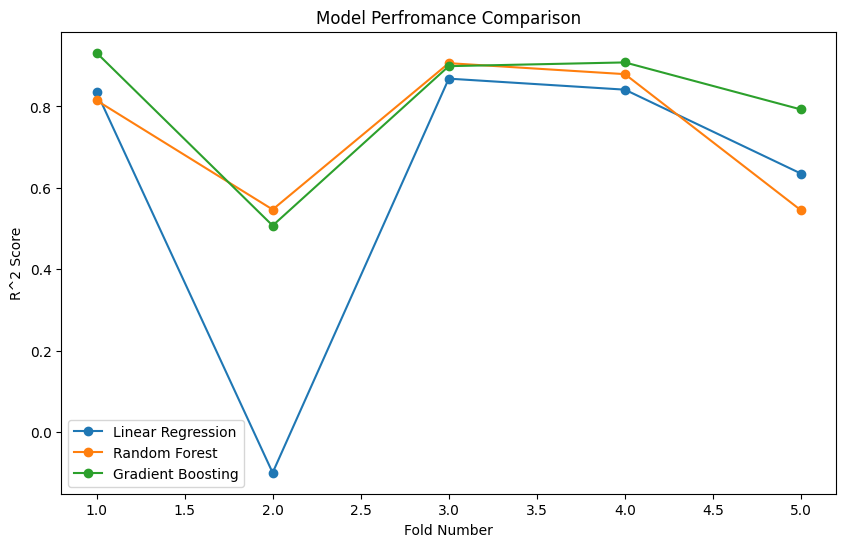

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # 앙상블 회귀 모델
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # 평가 지표를 위한 모듈

data_path = r"C:\Users\gram15\Desktop\python_basic_10\python_basic_1\machine.data_update.csv" 
column_labels = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
data_df = pd.read_csv(data_path, names=column_labels)
# 관련 컬럼을 숫자로 변환하고, 결측값이 있는 행 제거
numeric_data_df = data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')
numeric_data_df = numeric_data_df.dropna() # 결측값 행 제거
# 입력 데이터와 출력 데이터 분리
input_data = numeric_data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]] # 입력데이터
output_data = numeric_data_df["PRP"] # 출력 데이터
# 학습 데이터와 테스트 데이터 분할
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
# 수치형 특성 정의 및 변환 파이프라인 생성
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # 수치형 데이터 표준화
])
# 전처리기 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

models = [
    ('Linear Regression', LinearRegression()), # 선형 회귀
    ('Random Forest', RandomForestRegressor(random_state=42)), # 랜덤 포레스트
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))  # 그라디언트 부스팅
]
# 각 모델에 대한 파이프라인 생성
pipelines = []
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipelines.append((name, pipeline))
# 각 파이프라인에 대해 학습 및 평가
for name, pipeline in pipelines:
    pipeline.fit(train_input, train_output) # 학습 데이터로 모델 훈련
    train_predicted = pipeline.predict(train_input)  # 학습 데이터 예측
    test_predicted = pipeline.predict(test_input) # 테스트 데이터 예측
    # 학습 데이터에 대한 성능 지표 계산
 
    train_mse = mean_squared_error(train_output, train_predicted)
    train_mae = mean_absolute_error(train_output, train_predicted)
    train_r2 = r2_score(train_output, train_predicted)
    # 테스트 데이터에 대한 성능 지표 계산
    test_mse = mean_squared_error(test_output, test_predicted)
    test_mae = mean_absolute_error(test_output, test_predicted)
    test_r2 = r2_score(test_output, test_predicted)
 # 결과 출력
    print(f"Model: {name}")
    print(f"Train MSE: {train_mse}")
    print(f"Train MAE: {train_mae}")
    print(f"Train R^2: {train_r2}")
    print(f"Test MSE: {test_mse}")
    print(f"Test MAE: {test_mae}")
    print(f"Test R^2: {test_r2}")
    print("")
# 각 모델에 대한 교차 검증 R^2 점수 계산 및 출력
for name, pipeline in pipelines:
    cv_r2_scores = cross_val_score(pipeline, input_data, output_data, cv=5, scoring='r2')
    print(f"Model: {name}")
    print(f"Cross-validation R^2 scores: {cv_r2_scores}")
    print(f"Mean Cross-validation R^2 score: {np.mean(cv_r2_scores)}")
    print("")
    
# 교차 검증 R^2 점수를 시각화
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
for name, pipeline in pipelines:
    cv_r2_scores = cross_val_score(pipeline, input_data, output_data, cv=5, scoring='r2')
    plt.plot(range(1, 6), cv_r2_scores, marker='o', label=name)
plt.xlabel('Fold Number')  # x축 레이블 설정
plt.ylabel('R^2 Score') # y축 레이블 설정
plt.title('Model Perfromance Comparison')
plt.legend() # 범례 표시
plt.show() # 그래프 출력

(2) (1)단계에서 얻은 Pipeline 기반 모델 GridSearchCV의 best_estimator 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오.
- Mean squared Error, Mean absolute Error, R^2, 교차검증

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # 앙상블 회귀 모델
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 평가 지표를 위한 모듈
# 데이터셋 경로와 컬럼 이름 정의
data_location = r"C:\Users\gram15\Desktop\python_basic_10\python_basic_1\machine.data_update.csv"  # 데이터 파일 경로
column_labels = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"] # 칼럼 이름 정의
# 데이터셋 로드
data_df = pd.read_csv(data_location, names=column_labels)  # CSV 파일을 읽어와 데이터 프레임으로 변환
# 관련 칼럼을 숫자로 변환하고, 결측값이 있는 행 제거
numeric_data_df = data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')
numeric_data_df = numeric_data_df.dropna #결측값이 있는 행 제거
# 입력 데이터와 출력 데이터 분리
input_data = numeric_data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]] # 입력 데이터
output_data = numeric_data_df["PRP"] # 출력 데이터
# 학습 데이터와 테스트 데이터 분할
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
# 수치형 특성 정의 및 변환 파이프라인 생성
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]  # 수치형 특성
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # 수치형 데이터 표준화
])
# 전처리기 정의 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)  # 수치형 데이터 변환기 적용
    ])

models = [
    ('Linear Regression', LinearRegression()),   # 선형 회귀 모델
    ('Random Forest', RandomForestRegressor(random_state=42)), # 랜덤 포레스트 모델
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))  # 그라디언트 부스팅 모델
]

for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # 전처리기
                               ('model', model)]) # 모델
    
    param_grid = {}
    if name == 'Random Forest':
        param_grid = {
            'model__n_estimators': [50, 100, 150],  # 랜덤 포레스트의 n_estimators 파라미터
            'model__max_depth': [None, 5, 10, 15]  # 랜덤 포레스트의 max_depth 파라미터
        }
    elif name == 'Gradient Boosting':
        param_grid = {
            'model__n_estimators': [50, 100, 150], # 그라디언트 부스팅의 n_estimators 파라미터
            'model__max_depth': [3, 5, 7] # 그라디언트 부스팅의 max_depth 파라미터
        }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')  # 그리드 서치 생성
    grid_search.fit(train_input, train_output)  # 그리드 서치 실행
    best_estimator = grid_search.best_estimator_  # 최적 모델 추출

    train_predicted = best_estimator.predict(train_input) # 학습 데이터 예측
    test_predicted = best_estimator.predict(test_input)  # 테스트 데이터 예측

    train_mse = mean_squared_error(train_output, train_predicted) # MSE 계산
    train_mae = mean_absolute_error(train_output, train_predicted)  # MAE 계산
    train_r2 = r2_score(train_output, train_predicted)  # R^2 계산
    test_mse = mean_squared_error(test_output, test_predicted) # MSE 계산
    test_mae = mean_absolute_error(test_output, test_predicted)  # MAE 계산
    test_r2 = r2_score(test_output, test_predicted) # R^2 계산
    # 결과 출력하기
    print(f"Model: {name}")
    print(f"Best Estimator: {grid_search.best_params_}")
    print(f"Train MSE: {train_mse}")
    print(f"Train MAE: {train_mae}")
    print(f"Train R^2: {train_r2}")
    print(f"Test MSE: {test_mse}")
    print(f"Test MAE: {test_mae}")
    print(f"Test R^2: {test_r2}")
    print("")

Model: Linear Regression
Best Estimator: {}
Train MSE: 3117.658905430178
Train MAE: 35.12200634651687
Train R^2: 0.8378284557995717
Test MSE: 5633.068155793253
Test MAE: 48.068801347004765
Test R^2: 0.8893455830696775

Model: Random Forest
Best Estimator: {'model__max_depth': 15, 'model__n_estimators': 150}
Train MSE: 793.2728402880896
Train MAE: 11.396601828089853
Train R^2: 0.9587362551888824
Test MSE: 6750.166434266678
Test MAE: 34.171824263038545
Test R^2: 0.8674016166130997

Model: Gradient Boosting
Best Estimator: {'model__max_depth': 5, 'model__n_estimators': 50}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.8434742290818193



(3) (2)단계에서 얻은 Pipeline 기반 GridSearchCV의 best_estimator 모델의 테스트 데이터에 대해 예측 성능 R^2가 85%이상이 나오도록 모델을 개선하시오.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # 열 변환을 위한 함수
from sklearn.preprocessing import StandardScaler  # 데이터 스케일링을 위한 함수
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트 회귀 모델 임포트
from sklearn.metrics import r2_score # 모델 평가를 위한 R^2 지표 임포트

# 데이터셋 불러오기
data_path = r"C:\Users\gram15\Desktop\python_basic_10\python_basic_1\machine.data_update.csv"
column_names = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
dataset = pd.read_csv(data_path, names=column_names) # CSV 파일을 데이터프레임으로 읽어오기

# 숫자형 데이터만 선택하여 새로운 데이터프레임 생성
numeric_dataset = dataset[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')

# 결측값 확인 및 제거
numeric_dataset = numeric_dataset.dropna()

# 특징과 타겟 변수 정의
features = numeric_dataset[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]] # 입력 특징 데이터
target = numeric_dataset["PRP"] # 목표 데이터 (타겟)

# 훈련 데이터와 테스트 데이터 분리
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 전처리 및 모델링 파이프라인 정의
numeric_cols = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols) # 수치형 데이터에 대한 변환 
    ])

# 모델 파이프라인 정의 (Random Forest)
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

# 모델 파라미터 튜닝을 위한 그리드 설정
grid_params = {
    'model__n_estimators': [100, 200, 300], # 랜덤 포레스트 트리 개수
    'model__max_depth': [None, 5, 10, 15] # 랜덤 포레스트 트리 최대 깊이
}

# 그리드 서치를 사용하여 최적의 모델 찾기
grid_search = GridSearchCV(model_pipeline, grid_params, cv=5, scoring='r2') # 교차 검증으로 그리드 서치 설정
grid_search.fit(features_train, target_train) # 최적의 모델 하습
best_model = grid_search.best_estimator_ # 최적의 모델 저장

# 테스트 데이터에 대해 모델 성능 평가
target_test_pred = best_model.predict(features_test) # 테스트 데이터에 대한 예측값 계산
test_r2_score = r2_score(target_test, target_test_pred) # 테스트 데이터에 대한 R^2 점수 계산

print(f"Test R^2: {test_r2_score}") # 테스터 데이터에 대한 R^2 점수 출력


Test R^2: 0.86507805030759


(4) I. 3차 프로그래밍 과제의 기본모델의 (2) 단계와 II. 4차 프로그래밍 과제의 제안 모델의 (2) 단계에서 얻은 학습 데이터와 테스트 데이터에 대한 성능 지표(MSE, MAE, R^2, 교차 검증)를 데이터프레임에 저장하여 이 성능 결과를 바 차트로 시각화하여 학습 데이터와 테스트 데이터에 대한 각 모델의 성능 차이를 비교 분석하시오.

3차 프로그래밍 (2)단계

Cross-validation R^2 scores: [0.59473034 0.65937669 0.86749478 0.92848838 0.86565454]
Mean cross-validation R^2 score: 0.7831489467291473
Training Data - Mean Squared Error (MSE): 206.13991568998594
Training Data - Mean Absolute Error (MAE): 9.495366089990394
Training Data - R^2 Score: 0.9892772014313161
Test Data - Mean Squared Error (MSE): 7159.751255440656
Test Data - Mean Absolute Error (MAE): 38.71268098173043
Test Data - R^2 Score: 0.8593558468270719


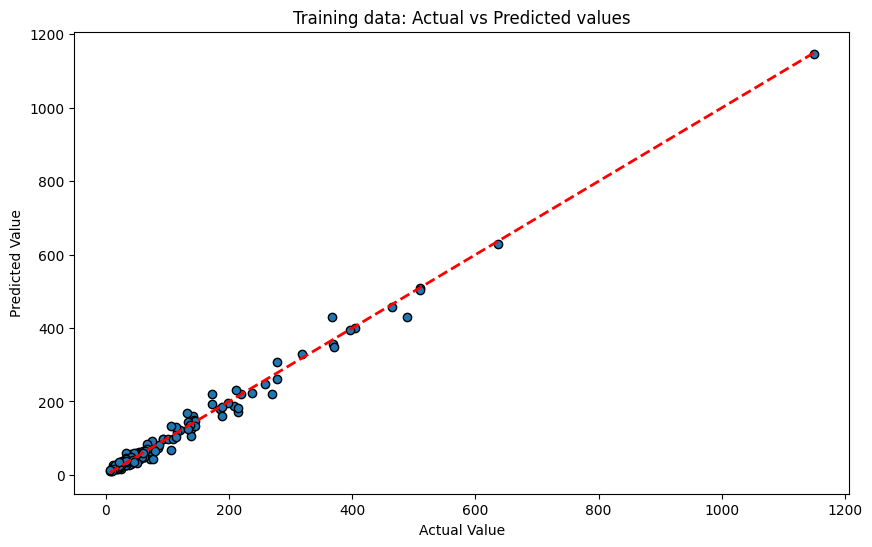

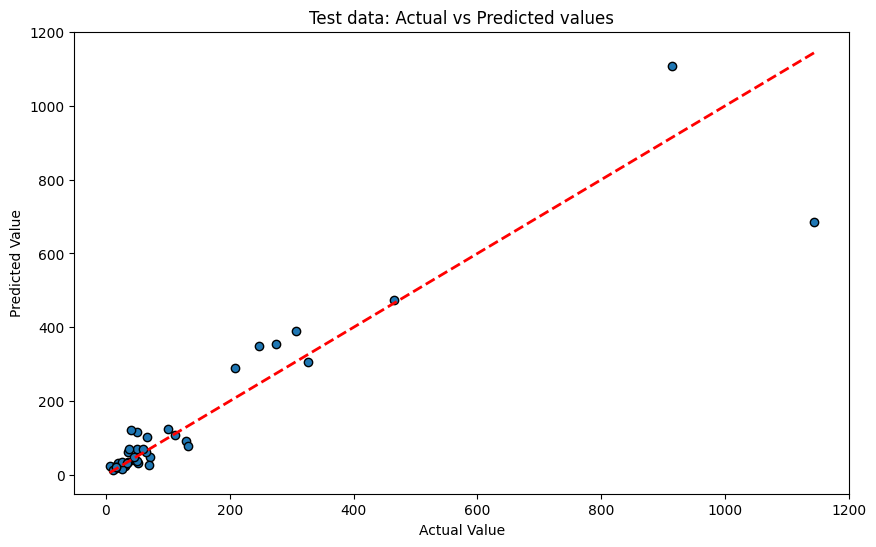

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score # sklearn의 train_test_split, cross_val_score 함수 가져오기
from sklearn.preprocessing import StandardScaler # sklearn의 StandardScaler 클래스 가져오기
from sklearn.ensemble import GradientBoostingRegressor   # sklearn의 GradientBoostingRegressor 클래스 가져오기
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # sklearn의 평가 지표 함수들 가져오기

# 데이터셋 불러오기
file_path = r"C:\Users\gram15\Desktop\python_basic_10\python_basic_1\machine.data_update.csv" # 파일 경로 설정
columns = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"] # 컬럼 이름 설정
data = pd.read_csv(file_path, names=columns)

# 숫자형 데이터만 선택하여 데이터프레임 생성
numeric_data = data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')
numeric_data = numeric_data.dropna()

# 입력 데이터와 출력 데이터 분리
X = numeric_data[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]] # 입력 데이터
y = numeric_data["PRP"] # 출력 데이터


# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 훈련 데이터와 테스트 데이터로 분할, 테스트 데이터는 전체의 20%, 난수 시드는 42로 고정


# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GradientBoostingRegressor 모델 생성 및 학습
model = GradientBoostingRegressor(random_state=42)  # GradientBoostingRegressor 모델 생성, 난수 시드는 42로 고정
model.fit(X_train_scaled, y_train) # 모델을 훈련 데이터에 맞추기

# 교차 검증을 통한 R^2 점수 계산
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2') # 교차 검증을 통해 R^2 점수 계산, 폴드 개수는 5개
print(f"Cross-validation R^2 scores: {cross_val_scores}") # 교차 검증 R^2 점수 출력
print(f"Mean cross-validation R^2 score: {np.mean(cross_val_scores)}") # 평균 교차 검증 R^2 점수 출력

# 훈련 데이터 성능 평가
y_train_pred = model.predict(X_train_scaled)  # 훈련 데이터에 대한 예측값 계산
train_mse = mean_squared_error(y_train, y_train_pred) # 훈련 데이터의 평균 제곱 오차(MSE) 계산
train_mae = mean_absolute_error(y_train, y_train_pred)  # 훈련 데이터의 평균 절대 오차(MAE) 계산
train_r2 = r2_score(y_train, y_train_pred) # 훈련 데이터의 R^2 점수 계산

print(f"Training Data - Mean Squared Error (MSE): {train_mse}") # MSE출력
print(f"Training Data - Mean Absolute Error (MAE): {train_mae}") #MAE 출력
print(f"Training Data - R^2 Score: {train_r2}") # R^2 출력

# 테스트 데이터 성능 평가
y_test_pred = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Data - Mean Squared Error (MSE): {test_mse}")
print(f"Test Data - Mean Absolute Error (MAE): {test_mae}")
print(f"Test Data - R^2 Score: {test_r2}")

# 실제 값과 예측 값 시각화 (훈련 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Training data: Actual vs Predicted values")
plt.show()

# 실제 값과 예측 값 시각화 (테스트 데이터)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Test data: Actual vs Predicted values")
plt.show()



4차 프로그래밍 (2)단계

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 데이터셋 경로와 컬럼 이름 정의
data_location = r"C:\Users\gram15\Desktop\python_basic_10\python_basic_1\machine.data_update.csv"
column_labels = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]

# 데이터셋 로드
data_df = pd.read_csv(data_location, names=column_labels)

# 관련 칼람을 숫자로 변환하고, 결측값이 있는 행 제거
numeric_data_df = data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')
numeric_data_df = numeric_data_df.dropna()  # 결측값이 있는 행 제거

# 입력 데이터와 출력 데이터 분리
input_data = numeric_data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]]  # 입력 데이터
output_data = numeric_data_df["PRP"]  # 출력 데이터

# 학습 데이터와 테스트 데이터 분할
train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# 수치형 특성 정의 및 변환 파이프라인 생성
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # 표준화 스케일러 사용한 변환 파이프라인 정의
])

# 전처리기 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

models = [
    ('Linear Regression', LinearRegression()), # 선형 회귀 모델
    ('Random Forest', RandomForestRegressor(random_state=42)),  # 랜덤 포레스트 회귀 모델
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)) # 그래디언트 부스팅 회귀 모델
]
# 각 모델에 대해 그리드 서치를 수행하고 평가 지표 출력
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                               ('model', model)]) # 전처리기와 모델을 파이프라인으로 묶음

    param_grid = {} # 그리드 서치를 위한 파라미터 그리드 초기화
    if name == 'Random Forest':
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [None, 5, 10, 15]
        }
    elif name == 'Gradient Boosting': # 그래디언트 부스팅 모델의 경우
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [3, 5, 7]
        }

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(train_input, train_output)
    best_estimator = grid_search.best_estimator_ # 최적의 모델 추출

    train_predicted = best_estimator.predict(train_input) # 훈련 데이터에 대한 예측값 계산
    test_predicted = best_estimator.predict(test_input) # 테스트 데이터에 대한 예측값 계산

    train_mse = mean_squared_error(train_output, train_predicted)  # 훈련 데이터의 평균 제곱 오차(MSE) 계산
    train_mae = mean_absolute_error(train_output, train_predicted) # 훈련 데이터의 평균 절대 오차(MAE) 계산
    train_r2 = r2_score(train_output, train_predicted) # 훈련 데이터의 R^2 점수 계산
    test_mse = mean_squared_error(test_output, test_predicted) # 테스트 데이터의 MSE 계산
    test_mae = mean_absolute_error(test_output, test_predicted) # 테스트 데이터의 MAE 계산
    test_r2 = r2_score(test_output, test_predicted) # 테스트 데이터의 R^2 점수 계산

    # 결과 출력하기
    print(f"Model: {name}")
    print(f"Best Estimator: {grid_search.best_params_}")
    print(f"Train MSE: {train_mse}") # 훈련 데이터의 MSE 출력
    print(f"Train MAE: {train_mae}") # 훈련 데이터의 MAE 출력
    print(f"Train R^2: {train_r2}") # 훈련 데이터의 R^2 출력
    print(f"Test MSE: {test_mse}") # 테스트 데이터의 MSE 출력
    print(f"Test MAE: {test_mae}")  # 테스트 데이터의 MAE 출력
    print(f"Test R^2: {test_r2}") # 테스트 데이터의 R^2 출력
    print("")


Model: Linear Regression
Best Estimator: {}
Train MSE: 3117.658905430178
Train MAE: 35.12200634651687
Train R^2: 0.8378284557995717
Test MSE: 5633.068155793253
Test MAE: 48.068801347004765
Test R^2: 0.8893455830696775

Model: Random Forest
Best Estimator: {'model__max_depth': 15, 'model__n_estimators': 150}
Train MSE: 793.2728402880896
Train MAE: 11.396601828089853
Train R^2: 0.9587362551888824
Test MSE: 6750.166434266678
Test MAE: 34.171824263038545
Test R^2: 0.8674016166130997

Model: Gradient Boosting
Best Estimator: {'model__max_depth': 5, 'model__n_estimators': 50}
Train MSE: 124.96859607469374
Train MAE: 6.642971522759473
Train R^2: 0.9934994972776868
Test MSE: 7968.234438173399
Test MAE: 39.48672303225771
Test R^2: 0.8434742290818193



성능 차이 비교 분석

C:\Users\gram15\AppData\Local\Temp\ipykernel_40260\3581745699.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=performance_df, palette="viridis")
C:\Users\gram15\AppData\Local\Temp\ipykernel_40260\3581745699.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=performance_df, palette="viridis")
C:\Users\gram15\AppData\Local\Temp\ipykernel_40260\3581745699.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R^2", data=performance_df, palette="viridis")
C:\Users\gram15\App

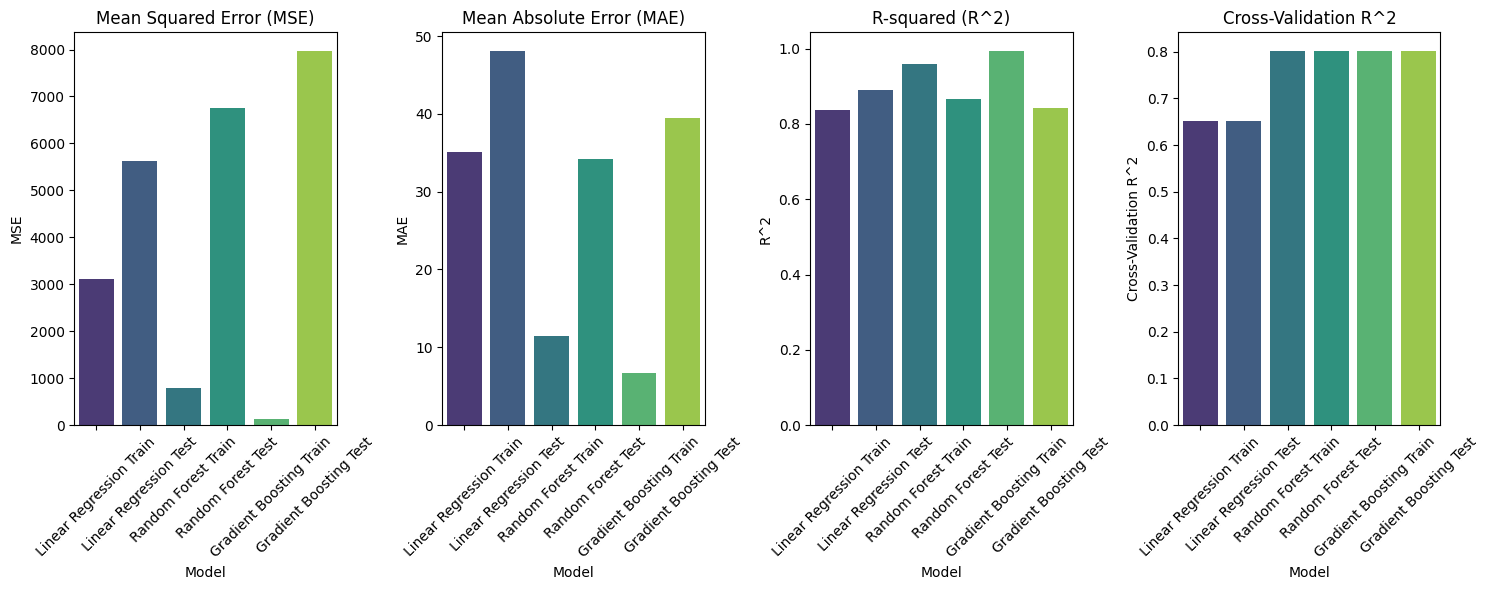

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 스타일 설정을 위한 씨본 라이브러리 임포트

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # 선형 회귀 모델 임포트
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # 랜덤 포레스트 및 그래디언트 부스팅 회귀 모델 임포트
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 성능 평가를 위한 지표 임포트
# 데이터셋 경로와 컬럼 이름 정의
data_location = r"C:\Users\gram15\Desktop\python_basic_10\python_basic_1\machine.data_update.csv"
column_labels = ["vendor_name", "model_name", "MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
# 데이터셋 로드
data_df = pd.read_csv(data_location, names=column_labels)
# 관련 칼럼을 숫자로 변환하고, 결측값이 있는 행 제거
numeric_data_df = data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP"]].apply(pd.to_numeric, errors='coerce')
numeric_data_df = numeric_data_df.dropna() # 결측값이 있는 행 제거
# 입력 데이터와 출력 데이터 분리
input_data = numeric_data_df[["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]] # 입력 데이터
output_data = numeric_data_df["PRP"] # 출력 데이터

train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, random_state=42)
# 수치형 특성 정의 및 변환 파이프라인 생성
numeric_features = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# 전처리기 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])
# 모델 리스트 정의
models = [
    ('Linear Regression', LinearRegression()), 
    ('Random Forest', RandomForestRegressor(random_state=42)),  
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]
# 성능 지표 데이터를 저장할 딕셔너리 초기화
performance_data = {
    "Model": [], # 모델명 저장 리스트
    "MSE": [], # MSE 저장 리스트
    "MAE": [], # MAE 저장 리스트
    "R^2": [],  # R^2 저장 리스트
    "Cross-Validation R^2": [] # Cross-Validation R^2 저장 리스트
}
# 성능 지표 데이터를 저장할 딕셔너리 초기화
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    param_grid = {}
    if name == 'Random Forest':
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [None, 5, 10, 15]
        }
    elif name == 'Gradient Boosting':
        param_grid = {
            'model__n_estimators': [50, 100, 150],
            'model__max_depth': [3, 5, 7]
        }
    # 그리드 서치 객체 생성
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(train_input, train_output) # 그리드 서치를 통한 모델 학습
    best_estimator = grid_search.best_estimator_  # 최적의 모델 저장

    train_predicted = best_estimator.predict(train_input)
    test_predicted = best_estimator.predict(test_input)

    train_mse = mean_squared_error(train_output, train_predicted)
    train_mae = mean_absolute_error(train_output, train_predicted)
    train_r2 = r2_score(train_output, train_predicted)
    test_mse = mean_squared_error(test_output, test_predicted)
    test_mae = mean_absolute_error(test_output, test_predicted)
    test_r2 = r2_score(test_output, test_predicted)

      # Cross-Validation을 통한 R^2 계산
    cv_scores = cross_val_score(best_estimator, train_input, train_output, cv=5, scoring='r2')
    cv_r2_mean = np.mean(cv_scores)

    performance_data["Model"].append(f"{name} Train")
    performance_data["Model"].append(f"{name} Test")
    performance_data["MSE"].append(train_mse)
    performance_data["MSE"].append(test_mse)
    performance_data["MAE"].append(train_mae)
    performance_data["MAE"].append(test_mae)
    performance_data["R^2"].append(train_r2)
    performance_data["R^2"].append(test_r2)
    performance_data["Cross-Validation R^2"].append(cv_r2_mean)
    performance_data["Cross-Validation R^2"].append(cv_r2_mean)
# 성능 지표 데이터프레임 생성
performance_df = pd.DataFrame(performance_data)
# 시각화 설정
plt.figure(figsize=(15, 6))
# MSE 그래프
plt.subplot(1, 4, 1)
sns.barplot(x="Model", y="MSE", data=performance_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Mean Squared Error (MSE)")
# MAE 그래프
plt.subplot(1, 4, 2)
sns.barplot(x="Model", y="MAE", data=performance_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Mean Absolute Error (MAE)")
# R^2 그래프
plt.subplot(1, 4, 3)
sns.barplot(x="Model", y="R^2", data=performance_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("R-squared (R^2)")
# Cross-Validation R^2 그래프
plt.subplot(1, 4, 4)
sns.barplot(x="Model", y="Cross-Validation R^2", data=performance_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Cross-Validation R^2")

plt.tight_layout()
plt.show()
